<a href="https://colab.research.google.com/github/BuildABuddha/hazardous_neos/blob/master/hazardous_neos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Data imported from: 
# https://www.kaggle.com/shrutimehta/nasa-asteroids-classification/data

url = 'https://github.com/BuildABuddha/hazardous_neos/raw/master/nasa.csv'

df = pd.read_csv(url)

# Drop redundant columns:
df = df.drop(["Est Dia in KM(min)", "Est Dia in KM(max)",
              "Est Dia in Miles(min)", "Est Dia in Miles(max)", 
              "Est Dia in Feet(min)", "Est Dia in Feet(max)",
              "Relative Velocity km per sec", "Miles per hour",
              "Miss Dist.(Astronomical)", "Miss Dist.(lunar)", 
              "Miss Dist.(miles)", "Epoch Date Close Approach"],
             axis=1
             )

# Convert to datetime format:
df['Close Approach Date'] = pd.to_datetime(df['Close Approach Date'],
                                           infer_datetime_format=True)
df['Orbit Determination Date'] = pd.to_datetime(df['Orbit Determination Date'],
                                                infer_datetime_format=True)

df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Close Approach Date,Relative Velocity km per hr,Miss Dist.(kilometers),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,127.219879,284.472297,1995-01-01,22017.003799,62753692.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,146.067964,326.617897,1995-01-01,65210.346095,57298148.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,231.502122,517.654482,1995-01-08,27326.560182,7622911.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,8.801465,19.680675,1995-01-15,40225.948191,42683616.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,127.219879,284.472297,1995-01-15,35426.991794,61010824.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


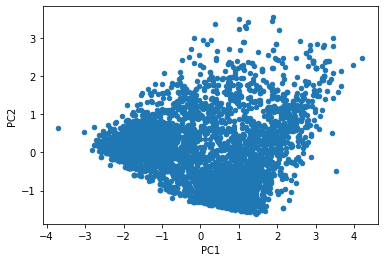

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df['Est Dia in M(mean)'] = (df['Est Dia in M(max)'] + df['Est Dia in M(min)'])/2

scaler = StandardScaler()
Z = scaler.fit_transform(df[["Absolute Magnitude", 
                             "Orbit Uncertainity",
                             "Minimum Orbit Intersection"]])

pca = PCA(2)
pca.fit(Z)
B = pca.transform(Z)

df['PC1'] = [row[0] for row in B]
df['PC2'] = [row[1] for row in B]

df.plot.scatter('PC1', 'PC2')

In [0]:
# Split dataframes:
df_threatening = df[df['Hazardous'] == True]
df_non_threatening = df[df['Hazardous'] == False]

In [17]:
df_threatening.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in M(mean),PC1,PC2
count,7.550000e+02,7.550000e+02,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.000000,755.000000,755.000000,755.000000
mean,2.935522e+06,2.935522e+06,20.120474,316.279086,707.221537,61796.107391,4.002637e+07,49.919205,1.207947,0.022782,5.046497,2.457810e+06,0.458029,1.387382,13.613582,176.289957,626.128650,0.699034,183.019184,2.075730,2.457810e+06,194.454402,0.748428,511.750312,0.601039,-1.048510
std,6.288250e+05,6.288250e+05,1.355240,288.129059,644.276161,27825.989010,2.146070e+07,48.697819,2.008058,0.013856,1.284372,7.858556e+02,0.183463,0.512366,11.516889,102.933541,358.066677,0.213081,97.914918,0.967751,8.056616e+02,103.080401,0.355367,466.202610,0.562511,0.406925
min,2.001566e+06,2.001566e+06,14.400000,80.270317,179.489885,11757.267064,3.249305e+05,2.000000,0.000000,0.000136,2.367000,2.450936e+06,0.049830,0.635216,0.247672,0.138230,184.918786,0.092784,3.273959,0.956042,2.450985e+06,1.290996,0.167459,129.880101,-1.202928,-1.605091
25%,2.356991e+06,2.356991e+06,19.300000,152.951935,342.010925,42078.499342,2.127111e+07,22.000000,0.000000,0.011218,4.050000,2.458000e+06,0.311189,1.007453,4.774065,84.819404,369.347632,0.547339,97.482195,1.353339,2.457837e+06,109.783658,0.463653,247.481430,0.318907,-1.319858
50%,3.102683e+06,3.102683e+06,20.300000,231.502122,517.654482,56187.682539,4.202599e+07,33.000000,0.000000,0.022942,5.094000,2.458000e+06,0.452321,1.225615,9.786674,171.715314,495.597821,0.716482,194.276028,1.709630,2.457994e+06,203.339611,0.726395,374.578302,0.672790,-1.158260
75%,3.553281e+06,3.553281e+06,21.200000,366.906138,820.427065,78018.182641,5.899273e+07,61.500000,1.000000,0.034093,5.958000,2.458000e+06,0.593903,1.653258,20.405681,263.277974,776.442341,0.884482,261.412095,2.556124,2.458112e+06,282.860350,0.974692,593.666601,0.958513,-0.928896
max,3.781344e+06,3.781344e+06,22.600000,3503.926411,7835.017643,160681.487851,7.450681e+07,350.000000,9.000000,0.049895,8.751000,2.458000e+06,0.926733,3.259846,75.406667,358.658780,2149.780555,1.051937,359.784687,5.924213,2.458706e+06,359.278503,1.946801,5669.472027,2.145638,0.588250


In [18]:
df_non_threatening.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Est Dia in M(mean),PC1,PC2
count,3.932000e+03,3.932000e+03,3932.000000,3932.000000,3932.000000,3932.000000,3.932000e+03,3932.000000,3932.000000,3932.000000,3932.000000,3.932000e+03,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000,3.932000e+03,3932.000000,3932.000000,3932.000000,3932.000000,3932.000000
mean,3.336964e+06,3.336964e+06,22.680195,183.161035,409.560525,48086.528016,3.810377e+07,24.149542,3.960326,0.093752,5.057957,2.457707e+06,0.368080,1.402737,13.327811,171.363741,637.397269,0.835340,184.107453,1.970134,2.457712e+06,178.616735,0.736287,296.360780,-0.115408,0.201329
std,5.069080e+05,5.069080e+05,2.924880,379.524042,848.641557,25356.616698,2.186682e+07,34.448890,3.049903,0.094190,1.228838,9.431158e+02,0.176221,0.526415,10.822088,103.336692,373.395401,0.241130,104.564669,0.947548,9.678610e+02,108.155920,0.340138,614.082799,1.487139,0.781067
min,2.000433e+06,2.000433e+06,11.160000,1.010543,2.259644,1207.814804,2.660989e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285,1.635094,-3.694298,-1.379297
25%,3.177206e+06,3.177206e+06,20.400000,27.832677,62.235757,28762.198924,1.955061e+07,8.000000,1.000000,0.016205,4.049750,2.458000e+06,0.229802,0.997497,4.996614,81.642004,363.886598,0.654609,94.973377,1.259949,2.457808e+06,82.411074,0.451415,45.034217,-1.435882,-0.284156
50%,3.554326e+06,3.554326e+06,22.700000,76.657557,171.411509,44271.721000,3.927889e+07,14.000000,5.000000,0.064235,5.061500,2.458000e+06,0.356979,1.245889,10.426338,172.630064,507.945815,0.858084,189.074521,1.603568,2.457969e+06,182.411752,0.708737,124.034533,-0.275644,0.123431
75%,3.703545e+06,3.703545e+06,24.900000,221.082810,494.356193,62396.244367,5.714771e+07,25.000000,7.000000,0.143296,6.033000,2.458000e+06,0.494075,1.683004,19.353882,252.366155,797.491630,1.018896,273.941608,2.419324,2.458107e+06,274.919764,0.989320,357.719501,1.159976,0.575090
max,3.781897e+06,3.781897e+06,32.100000,15579.552413,34836.938254,159280.880747,7.478160e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,72.146433,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000,25208.245333,4.215860,3.571428


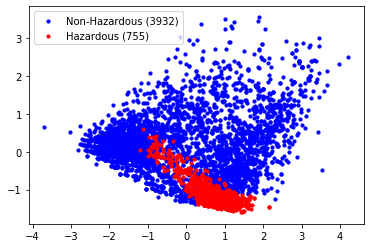

In [19]:
threat_PC1 = df_threatening.PC1.to_list()
threat_PC2 = df_threatening.PC2.to_list()
non_threat_PC1 = df_non_threatening.PC1.to_list()
non_threat_PC2 = df_non_threatening.PC2.to_list()

fig, ax = plt.subplots()


ax.scatter(non_threat_PC1, non_threat_PC2, 
           color='blue', 
           label='Non-Hazardous (' + str(len(df_non_threatening)) + ')', 
           s=10)
ax.scatter(threat_PC1, threat_PC2, 
           color='red', 
           label='Hazardous (' + str(len(df_threatening)) + ')',
           s=10)
ax.legend()
fig.show()

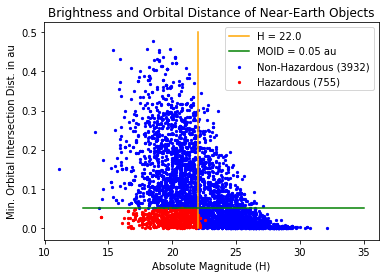

In [20]:
fig, ax = plt.subplots()

ax.scatter(df_non_threatening['Absolute Magnitude'], 
           df_non_threatening['Minimum Orbit Intersection'], 
           color='blue', 
           label='Non-Hazardous (' + str(len(df_non_threatening)) + ')',
           s=5)
ax.scatter(df_threatening['Absolute Magnitude'], 
           df_threatening['Minimum Orbit Intersection'], 
           color='red', 
           label='Hazardous (' + str(len(df_threatening)) + ')', 
           s=5)

x = plt.xlim()
y = plt.ylim()

ax.plot()
ax.plot([22, 22], [0,0.5], color='orange', label='H = 22.0')
ax.plot([13, 35], [0.05, 0.05], color='green', label='MOID = 0.05 au')
ax.legend()
plt.xlabel("Absolute Magnitude (H)")
plt.ylabel("Min. Orbital Intersection Dist. in au")
plt.title("Brightness and Orbital Distance of Near-Earth Objects")

fig.savefig('plot_1.png', dpi=400)
fig.show()

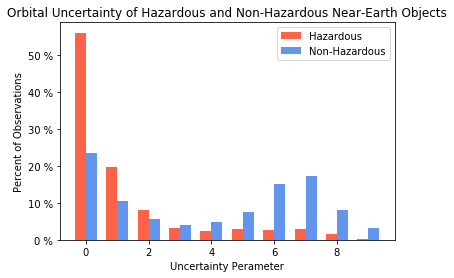

In [21]:
import matplotlib.ticker as mticker  

threat_uncertainty = [len(df_threatening[df_threatening['Orbit Uncertainity'] == n]) for n in range(0,10)]
threat_uncertainty = [n*100/len(df_threatening) for n in threat_uncertainty]

non_threat_uncertainty = [len(df_non_threatening[df_non_threatening['Orbit Uncertainity'] == n]) for n in range(0,10)]
non_threat_uncertainty = [n*100/len(df_non_threatening) for n in non_threat_uncertainty]

labels = [str(n) for n in range(0,10)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, threat_uncertainty, width, color='tomato', label="Hazardous")
rects2 = ax.bar(x + width/2, non_threat_uncertainty, width, color='cornflowerblue', label="Non-Hazardous")
ax.legend()

plt.title("Orbital Uncertainty of Hazardous and Non-Hazardous Near-Earth Objects")
plt.xlabel("Uncertainty Perameter")
plt.ylabel("Percent of Observations")

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d %%'))

fig.savefig('plot_2.png', dpi=400)

plt.show()